Saving 1.1.jpeg to 1.1.jpeg


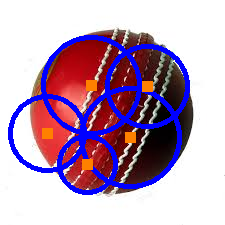

Ball detection complete. Image saved as 'output_with_ball.jpg'.


Saving 1.2.jpeg to 1.2.jpeg


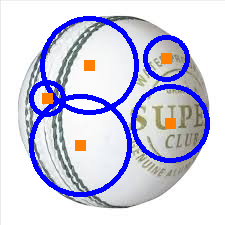

Ball detection complete. Image saved as 'output_with_ball.jpg'.


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Step 2: Read the uploaded image
for file_name in uploaded.keys():
    image = cv2.imread(file_name)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not loaded correctly.")
else:
    # Step 3: Detect the ball (using circle detection)

    # Convert the image to grayscale for easier processing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use Hough Circle Transform to detect the ball (if it's circular)
    circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=100, param2=30, minRadius=10, maxRadius=50)

    ball_position = None
    # Draw the detected ball
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (255, 0, 0), 4)  # Blue circle around the ball
            cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Mark the center of the ball
            ball_position = (x, y)

    # Step 4: Display the final image with detected ball
    cv2_imshow(image)

    # Save the processed image if needed
    cv2.imwrite('output_with_ball.jpg', image)

    print("Ball detection complete. Image saved as 'output_with_ball.jpg'.")
